# Assignment to be handed in to romain.madar@cern.ch **and** lennart.rustige@cern.ch by 29/09/2019 23:59:59 CEST

### Import and plots settings

a. Import the two usual packages and call the magic command (starting with `%`) to have plots inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

b. Tune the plot styles as you like using `mpl.rcParams` dictionary (one could look at [this page](https://matplotlib.org/users/customizing.html) to know all possibilities)

In [23]:
import matplotlib as mpl
mpl.rcParams['legend.frameon'] = False
mpl.rcParams['legend.fontsize'] = 'xx-large'
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['figure.figsize'] = (7, 5)

# Getting the data

Please go to https://cernbox.cern.ch/index.php/s/nIlY7BiteZrACfm and download the data set `data_set.npy`. This share is password protected and you should have received the passwort during the course. Otherwise please send us an email to lennart.rustige@cern.ch.

You can then load the data (stored in a binary format) into a numpy ndarray by setting the variable `file_name` to point to the file you have downloaded.

In [24]:
import DataGeneration as dg
data = dg.generate_data(1000000)

**a**. Familiarise yourself with the data set.
- what is the dimensionality
- how many entries are there
- how can you access certain elements 

In [25]:
data.shape

(1000000, 9, 3)

The data set should contain 1,000,000 observations (blocks) of 9 3D spatial positions (points), i.e. $r_i = (x,y,z)_i$, which are simply obtained from independent normal distributions with $(\mu_i,\sigma_i) = (\mu_x,\mu_y,\mu_z,\sigma_x,\sigma_y,\sigma_z)_i$. For this dataset, we set $\sigma_x=\sigma_y=\sigma_z=\sigma=1$ for all normal distributions. The mean however is different for each of the normal distributions corresponding to one of the 9 points, so that the points are centered on the 8 corners of a cube with a side length of $2d=10$ and the base at $(0,0)$.

If you did not fully understand this (and also otherwise), play around with the data and visualise it to get a better feeling of the structure.

**b**. Plot the 500 first observations in the $(x,y,z)$ space for all positions inclusively (with the same color), and then with one color for each of the 9 positions. 

In [26]:
def xyz(d):
    '''
    Helper function to get (x, y, z) from data 
    shaped as (N, 9, 3).
    '''
    return d[..., 0], d[..., 1], d[..., 2]

def plot(d, n=500):
    x, y, z = xyz(d[:n])
    ax = plt.axes(projection='3d')
    ax.scatter3D(x, y, z);

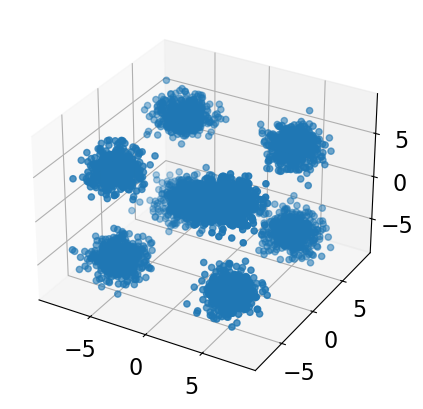

In [27]:
# With the same color
plot(data)

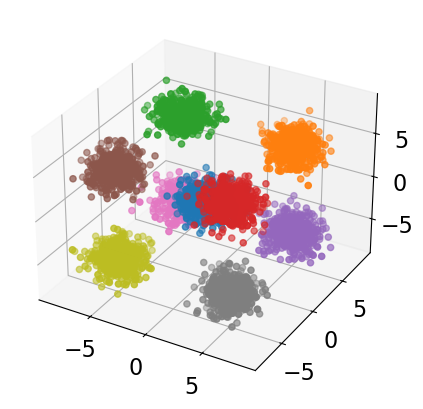

In [28]:
# With one color per corner
ax = plt.axes(projection='3d')
for i in range(data.shape[1]):
    x, y, z = xyz(data[:500, i])
    ax.scatter3D(x, y, z);

### Counting position within a circle of radius $R$

**a**. Select the $r_i$ which are inside a sphere centered around the origin with a radius $R=10$, and the ones which are outside of it. Plot each $r_i$ in space for the first 500 observations (different colour for whether they are inside or outside the sphere).

(8128472, 3)


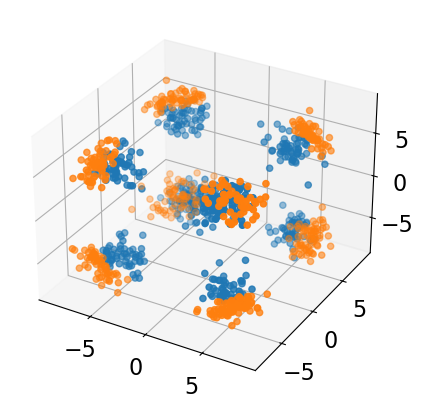

In [29]:
# Compute radius
radius = np.sum(data**2, axis=-1)**0.5

# Create a mask
inside = radius<10
outside = ~inside

# Apply the mask
data_i = data[inside]
data_o = data[outside]
print(data_i.shape)

ax = plt.axes(projection='3d')
for d in [data_i, data_o]:
    x, y, z = xyz(d[:500])
    ax.scatter3D(x, y, z);

b. Count the number of points **per observation** which are within the sphere, and plot the distribution of the number over the 1000000 observations.

In [34]:
np.linspace(-0.5, 9.5, 11)

array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5])

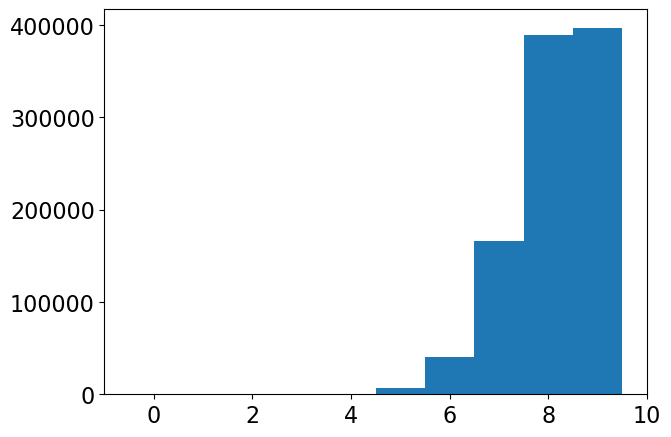

In [35]:
Ninside = np.count_nonzero(inside, axis=1)
plt.hist(Ninside, bins=np.linspace(-0.5, 9.5, 11));

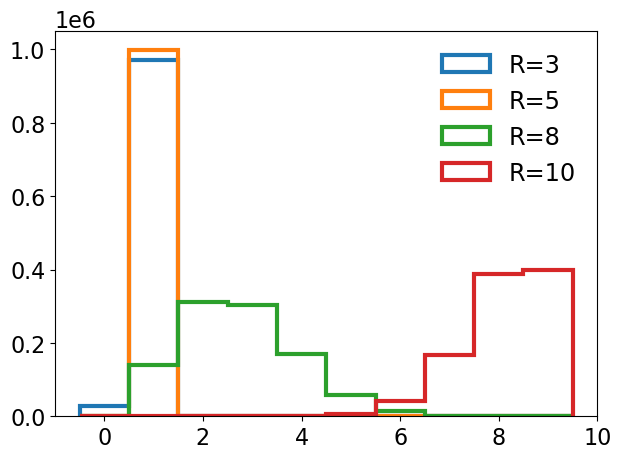

In [42]:
def compute_Ninside(R):
    return np.count_nonzero(radius<R, axis=1)

for r in [3, 5, 8, 10]:
    plt.hist(compute_Ninside(r), bins=np.linspace(-0.5, 9.5, 11), 
             label=f'R={r}', alpha=1.0, histtype='step', linewidth=3);
plt.legend();

**c**. Numerically compute the radius $R_{95\%}$ for a sphere that contains $95\%$ of all the points.

In [44]:
def fraction(R):
    N = compute_Ninside(R)
    return np.sum(N)/(data.shape[0]*data.shape[1])

Rs = np.linspace(0, 12, 200)
Fracs = np.array([fraction(r) for r in Rs])

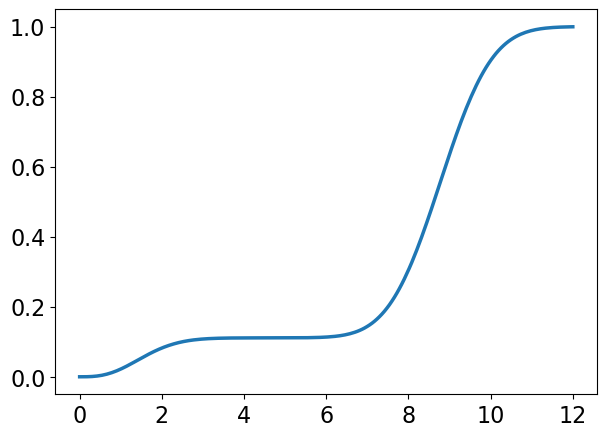

In [46]:
plt.plot(Rs, Fracs);

In [50]:
target = 0.95
residus = np.abs(Fracs - target)
imin = np.argmin(residus)
print(Rs[imin], Fracs[imin])

10.37185929648241 0.951883


In [51]:
# How to implement a given precision with a while loop
esp = 1e-3

# Impact of $\sigma$

You can study the effect of different variances on $R_{95\%}$ as computed above by creating your own datasets and redo the calculation.

We prepared a function to generate the data with different parameters in a `.py` file in this folder. You could import the content of that file into this notebook by using `import DataGeneration as dg`. 

Use the function defined in `DataGeneration` to create different data sets.

- what is the dependence of $R_{95\%}$ on the value of $\sigma$ that you choose?
- we are using randomn numbers for our simulation which change with each execution of the code. Statistically speaking, how stable is your computation of $R_{95\%}$? How does that change if you vary the number of simulated observations?
- how many observations do you nead at least to draw a meaningful conclusion about $R_{95\%}$? This is meant to be answered in a very general fashion. Is it 1? 10? 100? 1,000,000?